In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
l2_6000_run = pd.read_csv(
    f"results/l2_dummy_RTX6000Ada_gpu.csv", header=None, names=["M", "latency", "throughput", "power", "energy", "frequency", ""]
)
l2_6000_run.set_index(["M"], inplace=True)

l2_L4_run = pd.read_csv(
    f"results/l2_dummy_L4_gpu.csv", header=None, names=["M", "latency", "throughput", "power", "energy", "frequency", ""]
)
l2_L4_run.set_index(["M"], inplace=True)

l2_4090_run = pd.read_csv(
    f"results/l2_dummy_RTX4090_gpu.csv", header=None, names=["M", "latency", "throughput", "power", "energy", "frequency", ""]
)
l2_4090_run.set_index(["M"], inplace=True)

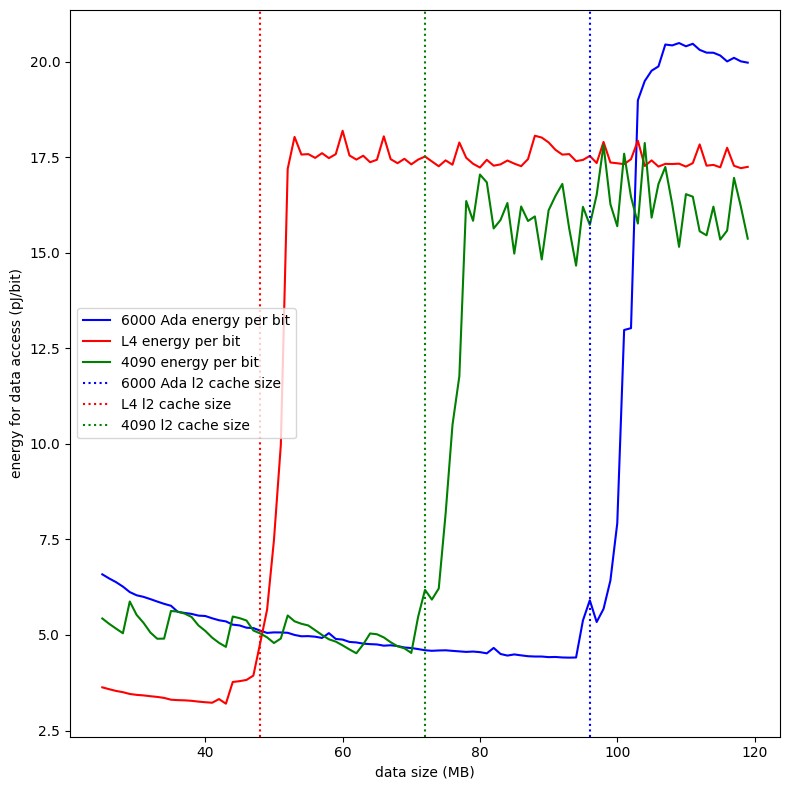

In [4]:
M_list = []
energy_6000_run_list = []
energy_6000_per_bit_list = []
energy_L4_run_list = []
energy_L4_per_bit_list = []
energy_4090_run_list = []
energy_4090_per_bit_list = []
for M in range(25, 120):
    M_list.append(M)
    energy_6000_run_list.append(l2_6000_run.loc[M, "energy"])
    energy_6000_per_bit_list.append(l2_6000_run.loc[M, "energy"] / (M * 1024 * 1024 * 16 * (2**5)))
    energy_L4_run_list.append(l2_L4_run.loc[M, "energy"])
    energy_L4_per_bit_list.append(l2_L4_run.loc[M, "energy"] / (M * 1024 * 1024 * 16 * (2**5)))
    energy_4090_run_list.append(l2_4090_run.loc[M, "energy"])
    energy_4090_per_bit_list.append(l2_4090_run.loc[M, "energy"] / (M * 1024 * 1024 * 16 * (2**5)))

fig, ax1 = plt.subplots(figsize=(8, 8))
ax1.set_xlabel("data size (MB)")
ax1.plot(M_list, energy_6000_per_bit_list, marker="", label=f"6000 Ada energy per bit", color='blue')
ax1.plot(M_list, energy_L4_per_bit_list, marker="", label=f"L4 energy per bit", color='red')
ax1.plot(M_list, energy_4090_per_bit_list, marker="", label=f"4090 energy per bit", color='green')


ax1.set_ylabel('energy for data access (pJ/bit)')

ax1.axvline(x=96, color='blue', linestyle='dotted', label='6000 Ada l2 cache size')
ax1.axvline(x=48, color='red', linestyle='dotted', label='L4 l2 cache size')
ax1.axvline(x=72, color='green', linestyle='dotted', label='4090 l2 cache size')
plt.legend()

plt.tight_layout()
plt.show()

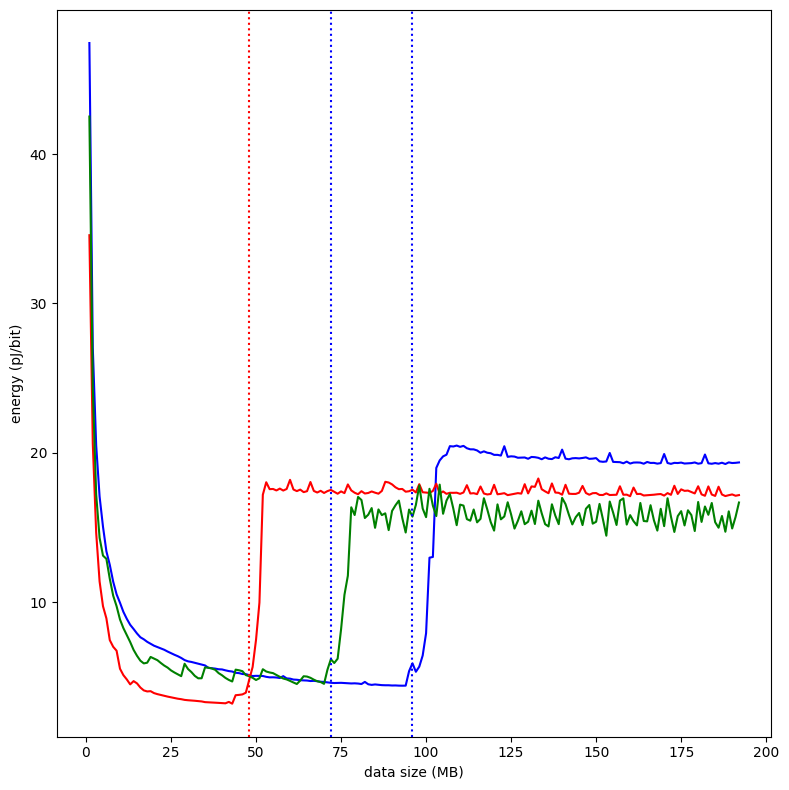

In [5]:
M_list = []
energy_6000_run_list = []
energy_6000_per_bit_list = []
flop_6000_run_list = []
energy_L4_run_list = []
energy_L4_per_bit_list = []
flop_L4_run_list = []
energy_4090_run_list = []
energy_4090_per_bit_list = []
flop_4090_run_list = []
for M in range(1, 193):
    M_list.append(M)
    energy_6000_run_list.append(l2_6000_run.loc[M, "energy"])
    energy_6000_per_bit_list.append(l2_6000_run.loc[M, "energy"] / (M * 1024 * 1024 * 16 * (2**5)))
    flop_6000_run_list.append(((M * 1024 * 1024) // 2 - 1) * 1e-12 / (float(l2_6000_run.loc[M, "latency"][:-3]) * 1e-3))
    energy_L4_run_list.append(l2_L4_run.loc[M, "energy"])
    energy_L4_per_bit_list.append(l2_L4_run.loc[M, "energy"] / (M * 1024 * 1024 * 16 * (2**5)))
    flop_L4_run_list.append(((M * 1024 * 1024) // 2 - 1) * 1e-12 / (float(l2_L4_run.loc[M, "latency"][:-3]) *1e-3))
    energy_4090_run_list.append(l2_4090_run.loc[M, "energy"])
    energy_4090_per_bit_list.append(l2_4090_run.loc[M, "energy"] / (M * 1024 * 1024 * 16 * (2**5)))
    flop_4090_run_list.append(((M * 1024 * 1024) // 2 - 1) * 1e-12 / (float(l2_4090_run.loc[M, "latency"][:-3]) *1e-3))


fig, ax1 = plt.subplots(figsize=(8, 8))
ax1.set_xlabel("data size (MB)")
ax1.plot(M_list, energy_6000_per_bit_list, marker="", label=f"6000 Ada energy per bit", color='blue')
ax1.plot(M_list, energy_L4_per_bit_list, marker="", label=f"L4 energy per bit", color='red')
ax1.plot(M_list, energy_4090_per_bit_list, marker="", label=f"4090 energy per bit", color='green')


ax1.set_ylabel('energy (pJ/bit)')
ax1.axvline(x=48, color='red', linestyle='dotted', label='L4 l2 cache size')
ax1.axvline(x=96, color='blue', linestyle='dotted', label='6000 Ada l2 cache size')
ax1.axvline(x=72, color='blue', linestyle='dotted', label='4090 l2 cache size')


# ax2 = ax1.twinx()
# ax2.plot(M_list, flop_6000_run_list, marker="", label=f"6000 Ada flop per ms", color='lightblue', linestyle='dashed')
# ax2.plot(M_list, flop_L4_run_list, marker="", label=f"L4 flop per ms", color='salmon', linestyle='dashed')
# ax2.set_ylabel('throughput of operations (TFLOPS/s)')



plt.tight_layout()
plt.show()

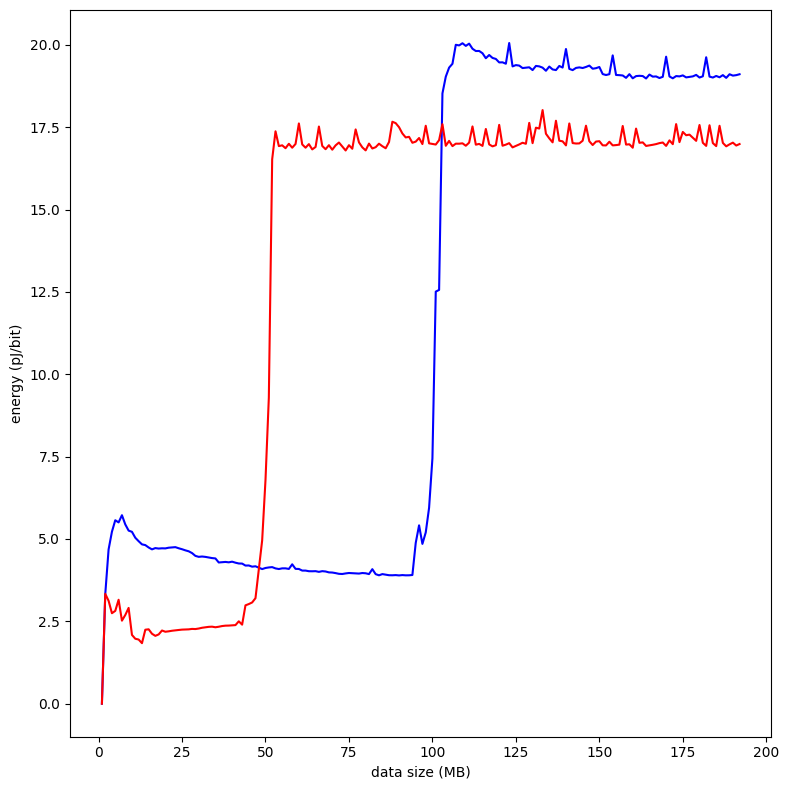

In [5]:
M_list = []
energy_6000_run_list = []
energy_6000_per_bit_list = []
energy_L4_run_list = []
energy_L4_per_bit_list = []
for M in range(1, 193):
    M_list.append(M)
    energy_6000_run_list.append(l2_6000_run.loc[M, "energy"])
    energy_6000_per_bit_list.append((l2_6000_run.loc[M, "energy"] - energy_6000_run_list[0]) / (M * 1024 * 1024 * 16 * (2**5)))
    energy_L4_run_list.append(l2_L4_run.loc[M, "energy"])
    energy_L4_per_bit_list.append((l2_L4_run.loc[M, "energy"] - energy_L4_run_list[0]) / (M * 1024 * 1024 * 16 * (2**5)))

fig, ax1 = plt.subplots(figsize=(8, 8))
ax1.set_xlabel("data size (MB)")
ax1.plot(M_list, energy_6000_per_bit_list, marker="", label=f"RTX4090 energy per bit", color='blue')
ax1.plot(M_list, energy_L4_per_bit_list, marker="", label=f"RTX4090 energy per bit", color='red')

ax1.set_ylabel('energy (pJ/bit)')

plt.tight_layout()
plt.show()